### <font color="brown">Problem Set 11: Data Exploration - Solution</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

---

### Problem 1

##### In this problem, you will explore a breast cancer dataset, breastCancer.csv

In [2]:
data = pd.read_csv("breastCancer.csv")

#### <font color="brown">1.1</font>

Perform plotting for this task using the inbuilt functions in Pandas.

1. Plot a histogram of 'Class' where 'breast-quad' and 'node-caps' are not NaN. 
2. In the column "inv-nodes", replace the class interval values by class mean, e.g., 3-5 becomes 4. Plot another histogram of 'Class' based on 'age' divided into 5 bins.

#### Solution

In [3]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


**1. Solution**

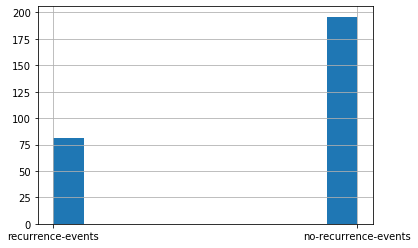

In [4]:
filtered_df = data[data[['node-caps', 'breast-quad']].notnull().all(1)]
filtered_df['Class'].hist()

**2. Solution**

In [5]:
def split(data):
    vals = data.split("-")
    return (int(vals[1]) + int(vals[0]))/2

data["inv-nodes"] = data["inv-nodes"].apply(split)

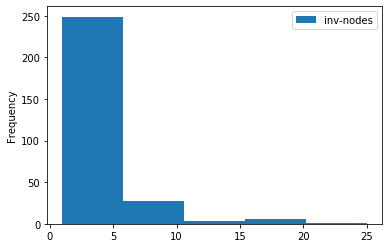

In [6]:
filtered_df = data[['Class', 'inv-nodes']]
ax = filtered_df.plot.hist(by='inv-nodes', bins=5)

#### <font color="brown">1.2</font>

Drop all null values before starting with these tasks.

1. Just like the "inv-nodes" column, replace the class interval values by class mean in the "tumor-size" column and plot a bar graph of the average tumor size for each "age" group.
2. For each menopause stage, plot a pie chart for degree of malignancy (deg-malig) values. Use subplots, where each subplot handles a menopause stage.
3. Label the recurrence and no-recurrence events as 0 and 1 respectively and plot a histogram to show the frequency of recurrence and no-recurrence events for different "breast-quad" values. Use subplots for the different breast-quad values.

#### Solution

In [7]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,1.0,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,1.0,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,1.0,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,1.0,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,4.0,yes,2,left,right_up,no,recurrence-events


In [8]:
data = data.dropna()

**1. Solution**

In [9]:
data["tumor-size"] = data["tumor-size"].apply(split)

In [10]:
uniqueAges = sorted(data["age"].unique(), key = lambda x: int(x.split("-")[0]))
tumorSizes = []
for x in uniqueAges:
    df = data[data["age"] == x]
    tumorSizes.append(df["tumor-size"].mean())

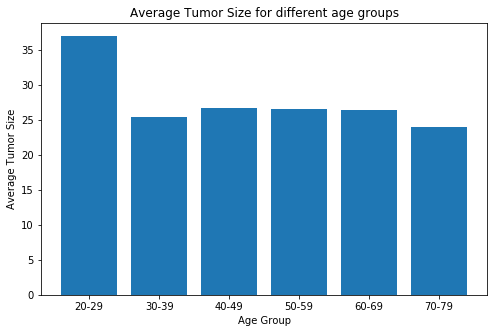

In [11]:
plt.figure(figsize=(8,5))
plt.bar(uniqueAges, tumorSizes)
plt.xlabel("Age Group")
plt.ylabel("Average Tumor Size")
plt.title("Average Tumor Size for different age groups")
plt.show()

**2. Solution**

In [12]:
unique_meno = data["menopause"].unique()

In [13]:
menopause_dfs = []
for x in unique_meno:
    menopause_dfs.append(data[data["menopause"] == x])

In [14]:
labels = data["menopause"].unique()
menopauseMalignancy = [x["deg-malig"].value_counts() for x in menopause_dfs]

In [15]:
malignancies = []
maligCounts = []
for x in menopauseMalignancy:
    counts = []
    malignancies.append(list(x.keys()))
    for key in x.keys():
        counts.append(x[key])
    maligCounts.append(counts)

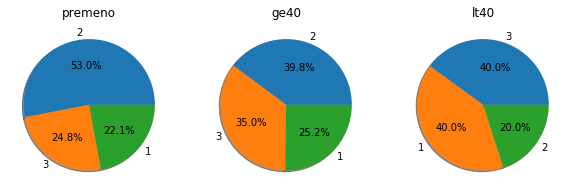

In [16]:
fig, axes = plt.subplots(1,len(unique_meno), figsize = (10, 10))

for i in range(len(unique_meno)):
    axes[i].pie(maligCounts[i], labels=malignancies[i], autopct='%1.1f%%', shadow=True)
    axes[i].set_title(unique_meno[i])

plt.show()

**3. Solution**

In [17]:
unique_quad = data["breast-quad"].unique()
data["Class"] = data["Class"].replace("recurrence-events", 0)
data["Class"] = data["Class"].replace("no-recurrence-events", 1)

In [18]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,17.0,1.0,yes,3,right,left_up,no,0
1,50-59,ge40,17.0,1.0,no,1,right,central,no,1
2,50-59,ge40,37.0,1.0,no,2,left,left_low,no,0
3,40-49,premeno,37.0,1.0,yes,3,right,left_low,yes,1
4,40-49,premeno,32.0,4.0,yes,2,left,right_up,no,0


In [19]:
percentVals = []
quad_dfs = []
for x in unique_quad:
    quad_dfs.append(data[data["breast-quad"] == x])

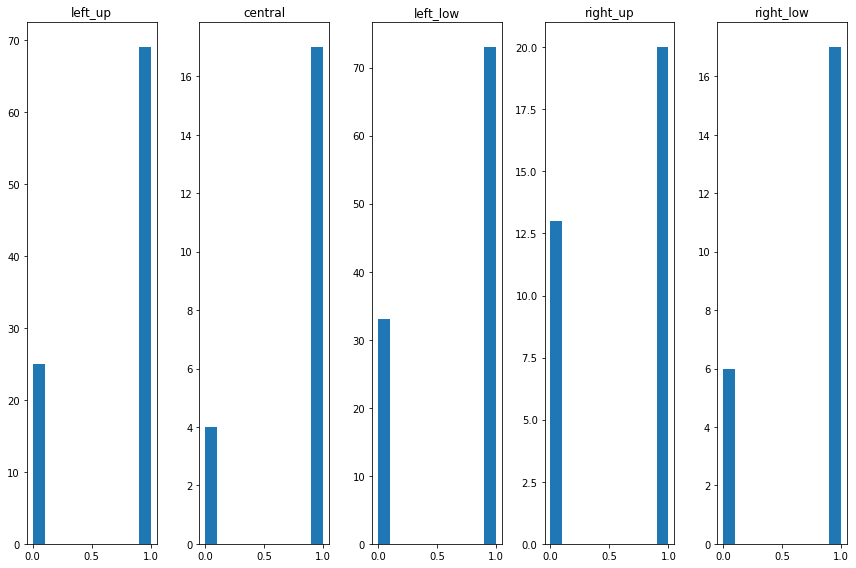

In [20]:
fig, axes = plt.subplots(1,len(unique_quad), figsize = (12, 8))

for i in range(len(unique_quad)):
    axes[i].hist(quad_dfs[i]["Class"])
    axes[i].set_title(unique_quad[i])
    
fig.tight_layout()    
plt.show()

---

### Problem 2

The following list shows the sales of items per month in a particular year. The months are labelled from 1 to 12. The total units per month are sum of all the units of items per months. 

In [21]:
facecream_sales = [2500, 2630, 2140, 3400, 3600, 2760, 2980, 3700, 3540, 1990, 2340, 2900]
shampoo_sales = [1200, 2100, 3550, 1870, 1560, 1890, 1780, 2860, 2100, 2300, 2400, 1800]
toothpaste_sales = [5200, 5100, 4550, 5870, 4560, 4890, 4780, 5860, 6100, 8300, 7300, 7400]
facewash_sales = [1500, 1200, 1340, 1130, 1740, 1555, 1120, 1400, 1780, 1890, 2100, 1760]

The profit distribution (multipler of sales numbers) is as follows: 

* facecream = 5 
* shampoo = 3
* toothpaste = 10

The total profit (per month) is calculated as the individual profit amount times the number of units per month.


1. Display the toothpaste sales data of each month and show it using a scatter plot. Also, add a grid in the plot. gridline style should be “–“.

2. Plot comparative monthly facecream and shampoo product sales data in a bar chart. 

3. Plot toothpaste and facewash sales data for each month in separate line plots in a vertically stacked grid.

4. Plot the total annual sales for all the products in a pie chart. In each slice of the pie, display the percentage sale of that product relative to the total sales of all products.

5. Plot a histogram for the total monthly profites of all products. Use 5 bins, and set the histogram ranges accordingly.


#### Solution

In [22]:
monthList = [i for i in range(1,13)]
total_units = [x + y + z for x, y, z in zip(facecream_sales,shampoo_sales,toothpaste_sales)]
total_profit = [5*x + 3*y + 10*z for x, y, z in zip(facecream_sales,shampoo_sales,toothpaste_sales)]

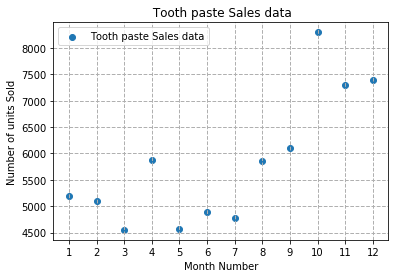

In [23]:
# 1. 

plt.scatter(monthList, toothpaste_sales, label = 'Tooth paste Sales data')
plt.xlabel('Month Number')
plt.ylabel('Number of units Sold')
plt.legend(loc='upper left')
plt.title(' Tooth paste Sales data')
plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

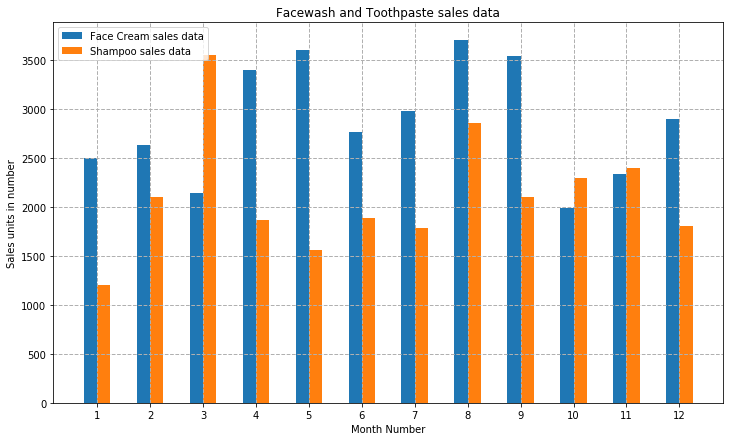

In [24]:
# 2. 

plt.figure(figsize=(12,7))
plt.bar([a-0.25 for a in monthList], facecream_sales, width= 0.25, label = 'Face Cream sales data', align='edge')
plt.bar([a+0.25 for a in monthList], shampoo_sales, width= -0.25, label = 'Shampoo sales data', align='edge')
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.title(' Sales data')

plt.xticks(monthList)
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Facewash and Toothpaste sales data')
plt.show()

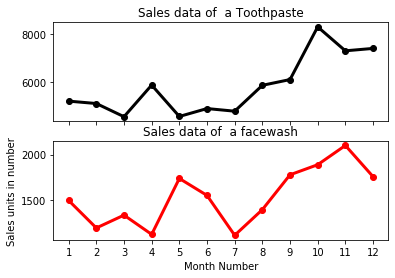

In [25]:
# 3. 

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(monthList, toothpaste_sales, label = 'Toothpaste Sales Data', color='k', marker='o', linewidth=3)
axarr[0].set_title('Sales data of  a Toothpaste')
axarr[1].plot(monthList, facewash_sales, label = 'Face Wash Sales Data', color='r', marker='o', linewidth=3)
axarr[1].set_title('Sales data of  a facewash')

plt.xticks(monthList)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.show()

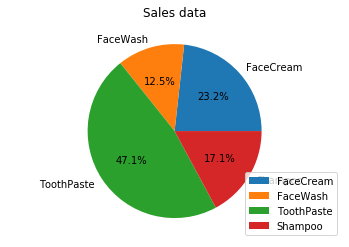

In [26]:
labels = ['FaceCream', 'FaceWash', 'ToothPaste', 'Shampoo']
salesData   = [sum(facecream_sales), sum(facewash_sales), sum(toothpaste_sales), sum(shampoo_sales)]
plt.axis("equal")
plt.pie(salesData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Sales data')
plt.show()

Minimum total profits 66850
Maximum total profits 99850


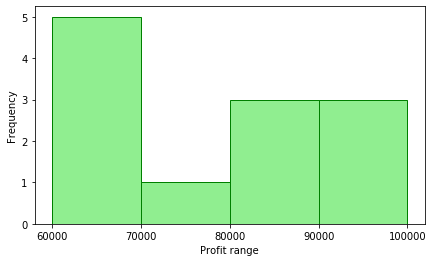

In [27]:
# 5. 

print("Minimum total profits", min(total_profit))
print("Maximum total profits", max(total_profit))

plt.figure(figsize=(7, 4))
plt.hist(total_profit,bins=range(60000,100001,10000),color='lightgreen',edgecolor='green')
plt.xticks(range(60000,100001,10000))
plt.xlabel('Profit range')
plt.ylabel('Frequency')
plt.show()

---

#### Problem 3

Here is the relative popularity figures for some programming languages:

<pre>
Programming languages: Java, Python, PHP, JavaScript, C#, C++ 
Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7
</pre>

Plot a bar chart of these popularities. Attach a text label above each bar displaying its popularity.

#### Solution

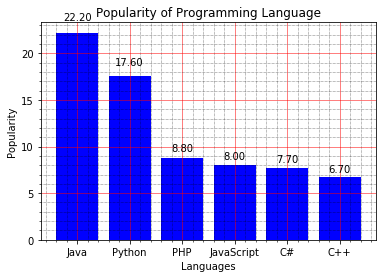

In [28]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, popularity, color='b')
plt.xlabel("Languages")
plt.ylabel("Popularity")
plt.title("Popularity of Programming Language")
plt.xticks(x_pos, x)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%.2f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()